# First Test

In [142]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [289]:
train_features = pd.read_csv("train/ground_measures_train_features.csv")
test_features = pd.read_csv("test/ground_measures_test_features.csv")
train_labels = pd.read_csv("train/train_labels.csv")
geodata = gpd.read_file('grid_cells.geojson')
ground_measures = pd.read_csv("ground_measures_metadata.csv")

In [211]:
train_labels["location"] = np.nan

In [74]:
print(train_features.shape)
print(train_labels.shape)
print(geodata.shape)
print(ground_measures.shape)

(700, 214)
(10878, 269)
(18130, 3)
(700, 6)


In [81]:
ids_geo = geodata["cell_id"]

In [80]:
ids_train = train_labels["cell_id"]

In [43]:
c = 0
for value in ids_train:
    for geo_value in ids_geo:
        if value == geo_value:
            c += 1
            break
print(c)

10878


In [111]:
geodata[ids_geo.isin(ids_train)].reset_index()

,index,cell_id,region,geometry
0,0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,sierras,"POLYGON ((-118.71895 37.07419, -118.71895 37.0..."
1,1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,central rockies,"POLYGON ((-107.07679 37.78042, -107.07679 37.7..."
2,3,000ba8d9-d6d5-48da-84a2-1fa54951fae1,sierras,"POLYGON ((-119.32082 37.43171, -119.32082 37.4..."
3,5,0017d1c4-64cb-426d-9158-3f6521d2dd22,sierras,"POLYGON ((-119.42862 37.23886, -119.42862 37.2..."
4,6,0020c632-3d5c-4509-b4ee-6b63a89bf2ff,sierras,"POLYGON ((-118.89862 36.85168, -118.89862 36.8..."
...,...,...,...,...
10873,18124,ffdc53d2-5565-496a-b849-4fcf33f33a36,sierras,"POLYGON ((-119.09625 37.04552, -119.09625 37.0..."
10874,18125,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,sierras,"POLYGON ((-118.62014 37.11718, -118.62014 37.1..."
10875,18126,ffe43514-2c92-43b6-bd84-d183806aca65,other,"POLYGON ((-123.49799 47.90132, -123.49799 47.9..."
10876,18128,fff95195-ccc9-40b7-b302-a0d8570c86bc,other,"POLYGON ((-123.37223 47.73242, -123.37223 47.7..."


In [121]:
all(geodata[ids_geo.isin(ids_train)]["cell_id"].reset_index()["cell_id"] == ids_train)

True

In [212]:
train_labels["location"] = geodata[ids_geo.isin(ids_train)].reset_index()["geometry"]

In [213]:
train_labels

,cell_id,2013-01-01,2013-01-08,2013-01-15,2013-01-22,2013-01-29,2013-02-05,2013-02-12,2013-02-19,2013-02-26,...,2019-06-14,2019-06-18,2019-06-24,2019-06-25,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31,location
0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.71895 37.07419, -118.71895 37.0..."
1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-107.07679 37.78042, -107.07679 37.7..."
2,000ba8d9-d6d5-48da-84a2-1fa54951fae1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-119.32082 37.43171, -119.32082 37.4..."
3,0017d1c4-64cb-426d-9158-3f6521d2dd22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-119.42862 37.23886, -119.42862 37.2..."
4,0020c632-3d5c-4509-b4ee-6b63a89bf2ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.89862 36.85168, -118.89862 36.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10873,ffdc53d2-5565-496a-b849-4fcf33f33a36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-119.09625 37.04552, -119.09625 37.0..."
10874,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.62014 37.11718, -118.62014 37.1..."
10875,ffe43514-2c92-43b6-bd84-d183806aca65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-123.49799 47.90132, -123.49799 47.9..."
10876,fff95195-ccc9-40b7-b302-a0d8570c86bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-123.37223 47.73242, -123.37223 47.7..."


In [79]:
ids_geo.isin(ids_train)

0         True
1         True
2        False
3         True
4        False
         ...  
18125     True
18126     True
18127    False
18128     True
18129     True
Name: cell_id, Length: 18130, dtype: bool

In [42]:
[[ -118.718953172819795, 37.07419231005138 ], [ -118.718953172819795, 37.08135922968016 ], [ -118.727936325661005, 37.08135922968016 ], [ -118.727936325661005, 37.07419231005138 ], [ -118.718953172819795, 37.07419231005138 ] ]

[[-118.7189531728198, 37.07419231005138],
 [-118.7189531728198, 37.08135922968016],
 [-118.727936325661, 37.08135922968016],
 [-118.727936325661, 37.07419231005138],
 [-118.7189531728198, 37.07419231005138]]

In [48]:
ground_measures

,station_id,name,elevation_m,latitude,longitude,state
0,CDEC:ADM,Adin Mountain,1889.760000,41.237000,-120.792000,California
1,CDEC:AGP,Agnew Pass,2880.360000,37.726631,-119.141731,California
2,CDEC:ALP,Alpha (Smud),2316.480000,38.804192,-120.215652,California
3,CDEC:BCB,Blackcap Basin,3139.440000,37.066685,-118.773010,California
4,CDEC:BCH,Beach Meadows,2331.720000,36.126095,-118.293457,California
...,...,...,...,...,...,...
695,SNOTEL:989_ID_SNTL,Moscow Mountain,1432.560059,46.805000,-116.853500,Idaho
696,SNOTEL:990_WA_SNTL,Beaver Pass,1106.423950,48.879299,-121.255501,Washington
697,SNOTEL:992_UT_SNTL,Bear River RS,2675.229492,40.885201,-110.827698,Utah
698,SNOTEL:998_WA_SNTL,Easy Pass,1606.296021,48.859329,-121.438950,Washington


In [ ]:
labels_location

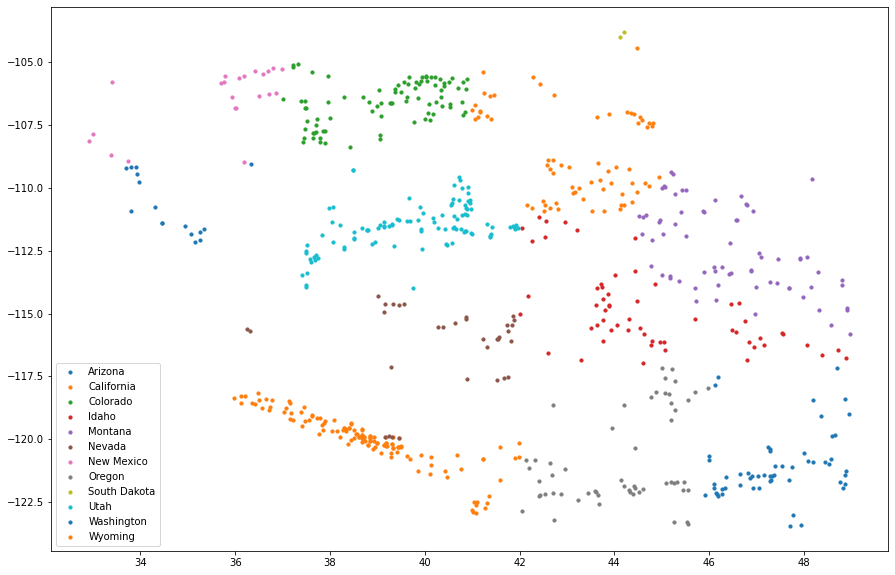

In [144]:
fig, ax = plt.subplots()
for g in np.unique(ground_measures["state"]):
    ix = np.where(ground_measures["state"] == g)
    x = ground_measures.iloc[ix]["latitude"]
    y = ground_measures.iloc[ix]["longitude"]
    ax.scatter(x, y, label = g, s = 10)
ax.legend()
plt.show()

In [130]:
geodata["geometry"][0].exterior.coords.xy

(array('d', [-118.7189531728198, -118.7189531728198, -118.727936325661, -118.727936325661, -118.7189531728198]),
 array('d', [37.07419231005138, 37.08135922968016, 37.08135922968016, 37.07419231005138, 37.07419231005138]))

In [131]:
def get_middle(pg):
    xy = pg.exterior.coords.xy
    x, y = xy[0], xy[1]
    x1, x2 = x[0], x[1]
    y1, y2 = y[0], y[1]
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    assert x1 <= mid_x <= x2, "Something is off: x"
    assert y1 <= mid_y <= y2, "Something is off: y"
    return mid_x, mid_y

In [ ]:
for p in geodata["geometry"]:
    print(get_middle(p))

In [214]:
train_labels["location"] = train_labels["location"].apply(get_middle)

In [215]:
train_labels

,cell_id,2013-01-01,2013-01-08,2013-01-15,2013-01-22,2013-01-29,2013-02-05,2013-02-12,2013-02-19,2013-02-26,...,2019-06-14,2019-06-18,2019-06-24,2019-06-25,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31,location
0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-118.7189531728198, 37.07777576986577)"
1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-107.0767870906308, 37.78397333401607)"
2,000ba8d9-d6d5-48da-84a2-1fa54951fae1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-119.3208244131799, 37.43527393760802)"
3,0017d1c4-64cb-426d-9158-3f6521d2dd22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-119.4286222472742, 37.24243563636779)"
4,0020c632-3d5c-4509-b4ee-6b63a89bf2ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-118.8986162296437, 36.85527598313992)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10873,ffdc53d2-5565-496a-b849-4fcf33f33a36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-119.09624559215, 37.049102672209195)"
10874,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-118.6201384915667, 37.1207650916254)"
10875,ffe43514-2c92-43b6-bd84-d183806aca65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-123.4979904843356, 47.90432872112956)"
10876,fff95195-ccc9-40b7-b302-a0d8570c86bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-123.3722263445589, 47.73543687890145)"


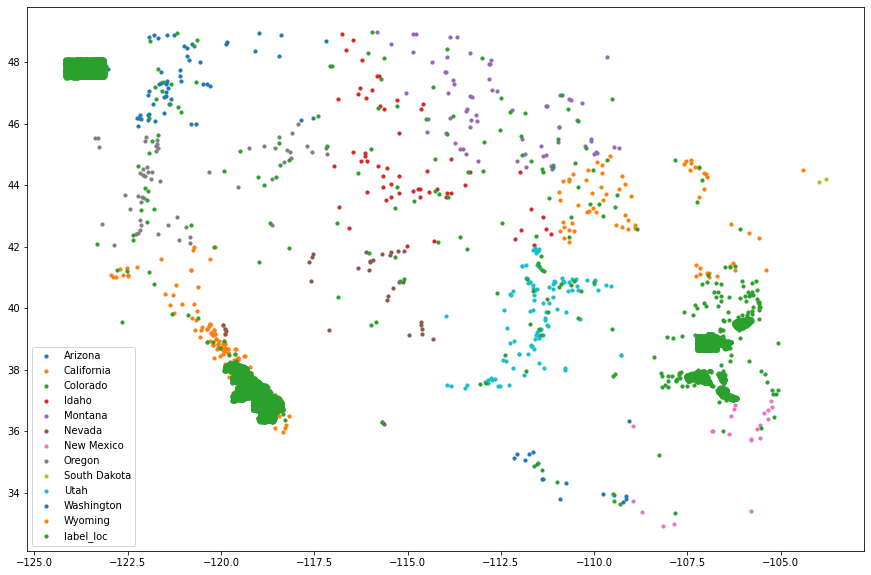

In [145]:
fig, ax = plt.subplots()
for g in np.unique(ground_measures["state"]):
    ix = np.where(ground_measures["state"] == g)
    x = ground_measures.iloc[ix]["longitude"]
    y = ground_measures.iloc[ix]["latitude"]
    ax.scatter(x, y, label = g, s = 10)
labels_x = train_labels["location"].apply(lambda x: x[0])
labels_y = train_labels["location"].apply(lambda x: x[1])
ax.scatter(labels_x, labels_y, label="label_loc", s=10)
ax.legend()
plt.show()

### Matching train stations and train labels via 1NN

In [173]:
points_x = ground_measures["longitude"]
points_y = ground_measures["latitude"]
distances = []
for x, y in zip(train_labels["location"].apply(lambda x: x[0]), train_labels["location"].apply(lambda x: x[1])):
    dist_x = (x - points_x)**2
    dist_y = (y - points_y)**2
    min_x = min(dist_x)
    min_y = min(dist_y)
    distances.append((x, y, min_x, min_y))

In [172]:
sorted(distances, key=lambda x: x[2] + x[3], reverse=True)[:10]

[(-124.1807101002665,
  48.01862106309312,
  0.5230708112839659,
  0.0007685608904173689),
 (-124.1807101002665,
  47.93443016994159,
  0.5230708112839659,
  0.00010859206576936415),
 (-124.1807101002665,
  48.08467475603855,
  0.5230708112839659,
  9.950769107796339e-05),
 (-124.1807101002665,
  47.976542776724884,
  0.5230708112839659,
  4.0155819335315595e-05),
 (-124.1807101002665,
  48.06066503433992,
  0.5230708112839659,
  7.544241719714818e-06),
 (-124.1717269474253,
  47.626573355163785,
  0.5101576230571542,
  0.003285346386035677),
 (-124.1717269474253,
  47.81995147890865,
  0.5101576230571542,
  0.0031643888740423265),
 (-124.1717269474253,
  47.868183862637856,
  0.5101576230571542,
  0.002409513714579934),
 (-124.1717269474253,
  47.60235060853191,
  0.5101576230571542,
  0.0021996258596176754),
 (-124.1717269474253,
  47.63868052088516,
  0.5101576230571542,
  0.0020440142214523623)]

In [156]:
train_labels.iloc[12]

cell_id         003fc268-c5c8-4a52-aaee-2f0802ce2b3f
2013-01-01                                       NaN
2013-01-08                                       NaN
2013-01-15                                       NaN
2013-01-22                                       NaN
                               ...                  
2019-12-10                                       NaN
2019-12-17                                       NaN
2019-12-24                                       NaN
2019-12-31                                       NaN
location      (-118.7369194785022, 36.6681623246359)
Name: 12, Length: 269, dtype: object

In [158]:
len(train_labels.columns.tolist()) - 40

229

In [166]:
train_labels.columns.tolist()[227]

'2019-03-19'

In [168]:
train_labels.iloc[12]['2019-03-17']

0.0

In [162]:
train_labels.iloc[12]['2019-03-24']

63.9

### Looking at the training data

In [199]:
from ipywidgets import interact, IntSlider, Layout
import ipywidgets as widgets

In [251]:
old_train_features = pd.read_csv("train/ground_measures_train_features.csv")
@interact(i=(IntSlider(0, 0, train_features.shape[0]-1, 1, layout=Layout(width='800px'))))
def plot_station(i):
    station = old_train_features.iloc[i][0]
    swe = old_train_features.iloc[i][1:]
    dates = range(len(swe))
    plt.plot(dates, swe)
    plt.title(station)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='800px'), max=699), Output()), _…

In [311]:
train_features = pd.read_csv("train/ground_measures_train_features.csv")
test_features = pd.read_csv("test/ground_measures_test_features.csv")

In [312]:
train_features.iloc[:, 1:] = train_features.iloc[:, 1:].astype(float).interpolate(method="linear", axis=1, limit_direction="both")
test_features.iloc[:, 1:] = test_features.iloc[:, 1:].astype(float).interpolate(method="linear", axis=1)
train_features.dropna(inplace=True)
test_features.dropna(inplace=True)

In [291]:
@interact(i=(IntSlider(0, 0, train_features.shape[0]-1, 1, layout=Layout(width='800px'))))
def plot_station(i):
    station = train_features.iloc[i][0]
    swe = train_features.iloc[i][1:]
    dates = range(len(swe))
    plt.plot(dates, swe)
    plt.title(station)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='800px'), max=699), Output()), _…

### Constructing Training Dataset

In [292]:
station_meta = {}
for oi, r in ground_measures.iterrows():
    station_meta[r[0]] = {
        'elev': r['elevation_m'],
        'lat': r['latitude'],
        'long': r['longitude']
    }

In [293]:
import math
from datetime import datetime
def df_to_xy(dataframe: pd.DataFrame):
    x = []
    y = []
    for oi, j in dataframe.iterrows():
        sx = math.cos(station_meta[j[0]]['lat']) * math.cos(station_meta[j[0]]['long'])
        sy = math.cos(station_meta[j[0]]['lat']) * math.sin(station_meta[j[0]]['long'])
        elev = station_meta[j[0]]['elev']
        for k, e in j.items():
            if k == 'Unnamed: 0':
                continue
            dt = datetime.strptime(k, '%Y-%m-%d')
            x.append(np.array([elev, sx, sy, dt.date().year, dt.date().month, dt.date().day]))
            y.append(e)

    return np.array(x), np.array(y)

In [313]:
train_features.isna().sum()

Unnamed: 0    0
2013-01-01    0
2013-01-08    0
2013-01-15    0
2013-01-22    0
             ..
2019-12-03    0
2019-12-10    0
2019-12-17    0
2019-12-24    0
2019-12-31    0
Length: 214, dtype: int64

In [314]:
x_train, y_train = df_to_xy(train_features)
x_test, y_test = df_to_xy(test_features)

In [315]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [318]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(x_train, y_train)

In [322]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [320]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [323]:
print(regression_results(y_train, y_pred_train))
print(regression_results(y_test, y_pred_test))

explained_variance:  0.071
mean_squared_log_error:  1.7812
r2:  0.071
MAE:  8.1349
MSE:  136.486
RMSE:  11.6827
None
explained_variance:  0.0673
mean_squared_log_error:  2.3087
r2:  -0.1166
MAE:  9.0169
MSE:  122.0958
RMSE:  11.0497
None
